In [23]:
#! /usr/bin/env python
# Compute psfres-mag and psfres-colour on deep fields


from __future__ import print_function
import os
import numpy as np
#from read_psf_cats import read_data, band_combinations
import fitsio
import treecorr
import matplotlib
#matplotlib.use('Agg')
import matplotlib.pyplot as plt
from astropy.io import fits
from astropy.table import Table,join
import h5py as h




In [21]:
#need a file with PSF residuals and ones with mags/fluxes/colours

from astropy.io import fits
hdul =fits.open('/global/cscratch1/sd/aamon/DEEPpsfs/UVISTA_H_21_01_16_psfcat.psf')
cols = hdul[1].columns
print(cols)

h = fitsio.read_header('/global/cscratch1/sd/aamon/DEEPpsfs/UVISTA_H_21_01_16_psfcat.psf')
print(h)

data = fitsio.read('/global/cscratch1/sd/aamon/DEEPpsfs/UVISTA_H_21_01_16_psfcat.psf') 
print(data)

hdul =fits.open('/global/cscratch1/sd/aamon/DEEPpsfs/UVISTA_H_21_01_16_psfcat.psf')
cols = hdul[1].columns
print(cols)

ColDefs(
    name = 'PSF_MASK'; format = '22326E'; dim = '(61, 61, 6)'
)

SIMPLE  =                    T / This is a FITS file
BITPIX  =                    8 /
NAXIS   =                    0 /
EXTEND  =                    T / This file may contain FITS extensions
[ ([[[  0.00000000e+00,   0.00000000e+00,   0.00000000e+00,   0.00000000e+00,   0.00000000e+00,   0.00000000e+00,   0.00000000e+00,   0.00000000e+00,   0.00000000e+00,   0.00000000e+00,   0.00000000e+00,   0.00000000e+00,   0.00000000e+00,   0.00000000e+00,   0.00000000e+00,   0.00000000e+00,   0.00000000e+00,   0.00000000e+00,   0.00000000e+00,   0.00000000e+00,   0.00000000e+00,   0.00000000e+00,   0.00000000e+00,   0.00000000e+00,   0.00000000e+00,   5.13485475e-07,   1.42683484e-06,   2.16932267e-06,   2.71852423e-06,   3.05291132e-06,   3.16317778e-06,   3.05101798e-06,   2.71453337e-06,   2.16378726e-06,   1.42004490e-06,   5.08048458e-07,   0.00000000e+00,   0.00000000e+00,   0.00000000e+00,   0.00000000e+00,   0.000000

In [24]:
prefix='piff' #'psfex'

#reserve stars catalogue with Piff solutions

data = fitsio.read('/global/cscratch1/sd/amichoi/VIDEO/VIDEO_Ks_9_9.49_-44.13.cleaned.fits')

#data = fitsio.read('/global/homes/m/mjarvis/desdata/users/mjarvis/y3a1-v29/psf_y3a1-v29.fits')
#print(data)
#h = fitsio.read_header('/global/homes/m/mjarvis/desdata/users/mjarvis/y3a1-v29/psf_y3a1-v29.fits')
#print(h)
band=data['band']
thisband="r"
data=data[np.where(band ==thisband)]
print(len(data))
#print(data[:100])
data = data[data['ra'].argsort()][:100000]
#print(data)
print(len(data))

rastarcat = data['ra']
rastarcat[rastarcat > 180] -= 360
decstarcat = data['dec'] 



NameError: name 'd' is not defined

In [27]:
#read in Erin's catalogue

data = fits.open('/global/cscratch1/sd/aamon/deepfields/run-fmof-dv02.fits')
data.info() 
print(data.info)
deep=Table(data[1].data)
#print(deep)
print(max(deep['ra']))
print(min(deep['ra']))
#cosmos=deep['ra']

ra=deep['ra']
dec=deep['dec']
psfflux=deep['psf_flux']
psfmag=deep['psf_mag']  #ugrizYJHKs
psfsize=deep['psf_T']

print(psfmag)
cols = data[1].columns
print(cols)


Filename: /global/cscratch1/sd/aamon/deepfields/run-fmof-dv02.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU       6   ()      
  1  model_fits    1 BinTableHDU     63   347296R x 26C   [K, D, D, E, E, K, J, 11A, E, 2D, D, 9J, 9D, 9D, 9D, 9D, J, J, D, 9D, 9D, 81D, 9D, 9D, 81D, 9D]   
  2  epochs_data    1 BinTableHDU     17   2993157R x 4C   [K, I, J, 18D]   
<bound method HDUList.info of [<astropy.io.fits.hdu.image.PrimaryHDU object at 0x2aaad63b7b50>, <astropy.io.fits.hdu.table.BinTableHDU object at 0x2aaad63b4910>, <astropy.io.fits.hdu.table.BinTableHDU object at 0x2aaad63b4e50>]>
150.793280273
149.435126896
         psf_mag [9]          
------------------------------
29.1331065055 .. 25.2781065201
28.2586461251 .. 27.0934785006
27.9402203592 .. 27.8126900851
 27.905518235 .. 26.4259625106
 27.788738556 .. 26.3216902539
          37.5 .. 26.784105766
26.7676660967 .. 26.2344091494
28.2020399389 .. 27.6725407607
 28.135050078 .. 27

In [ ]:
def compute_res(d):

    de1 =  d['obs_e1']-d[prefix+'_e1']
    de2 =  d['obs_e2']-d[prefix+'_e2']
    dt =  (d['obs_T']-d[prefix+'_T'])
    dtfrac = dt/d['obs_T']
    print('mean de = ',np.mean(de1),np.mean(de2))
    print('mean dt = ',np.mean(dt))

    return dtfrac, dt,  de1, de2

In [ ]:
fracsizeres, sizeres, e1res, e2res=compute_res(data)

In [ ]:
#want psf vs mag- brighter vs fatter
def bin_by_mag(m, dT, dTfrac, de1, de2, min_mused):
    min_mag = 13.5
    max_mag = 21
     
    mag_bins = np.linspace(min_mag,max_mag,71)
    print('mag_bins = ',mag_bins)

    index = np.digitize(m, mag_bins)
    print('len(index) = ',len(index))
    bin_de1 = [de1[index == i].mean() for i in range(1, len(mag_bins))]
    print('bin_de1 = ',bin_de1)
    bin_de2 = [de2[index == i].mean() for i in range(1, len(mag_bins))]
    print('bin_de2 = ',bin_de2)
    bin_dT = [dT[index == i].mean() for i in range(1, len(mag_bins))]
    print('bin_dT = ',bin_dT)
    bin_dTfrac = [dTfrac[index == i].mean() for i in range(1, len(mag_bins))]
    print('bin_dTfrac = ',bin_dTfrac)
    bin_de1_err = [ np.sqrt(de1[index == i].var() / len(de1[index == i]))
                    for i in range(1, len(mag_bins)) ]
    print('bin_de1_err = ',bin_de1_err)
    bin_de2_err = [ np.sqrt(de2[index == i].var() / len(de2[index == i]))
                    for i in range(1, len(mag_bins)) ]
    print('bin_de2_err = ',bin_de2_err)
    bin_dT_err = [ np.sqrt(dT[index == i].var() / len(dT[index == i]))
                    for i in range(1, len(mag_bins)) ]
    print('bin_dT_err = ',bin_dT_err)
    bin_dTfrac_err = [ np.sqrt(dTfrac[index == i].var() / len(dTfrac[index == i]))
                    for i in range(1, len(mag_bins)) ]
    print('bin_dTfrac_err = ',bin_dTfrac_err)

    # Fix up nans
    for i in range(1,len(mag_bins)):
        if i not in index:
            bin_de1[i-1] = 0.
            bin_de2[i-1] = 0.
            bin_dT[i-1] = 0.
            bin_dTfrac[i-1] = 0.
            bin_de1_err[i-1] = 0.
            bin_de2_err[i-1] = 0.
            bin_dT_err[i-1] = 0.
            bin_dTfrac_err[i-1] = 0.
    #print('fixed nans')
    #print('index = ',index)
    #print('bin_de1 = ',bin_de1)
    #print('bin_de2 = ',bin_de2)
    #print('bin_dT = ',bin_dT)

    fig, axes = plt.subplots(3,1, sharex=True)
    
    ax = axes[0]
    ax.set_ylim(-0.002,0.002)
    ax.plot([min_mag,max_mag], [0,0], color='black')
    ax.plot([min_mused,min_mused],[-1,1], color='Grey')
    ax.fill( [min_mag,min_mag,min_mused,min_mused], [-1,1,1,-1], fill=True, color='Grey',alpha=0.3)
    t_line = ax.errorbar(mag_bins[:-1], bin_dT, yerr=bin_dT_err, color='darkturquoise', fmt='o')
    ax.axhline(y=0.003, linewidth=4, color='grey')
    #ax.legend([t_line], [r'$\delta T$'])
    ax.set_ylabel(r'$(T_{\rm PSF} - T_{\rm model}) \quad({\rm arcsec}^2)$')

    ax = axes[1]
    ax.set_ylim(-0.002,0.002)
    ax.plot([min_mag,max_mag], [0,0], color='black')
    ax.plot([min_mused,min_mused],[-1,1], color='Grey')
    ax.fill( [min_mag,min_mag,min_mused,min_mused], [-1,1,1,-1], fill=True, color='Grey',alpha=0.3)
    t_line = ax.errorbar(mag_bins[:-1], bin_dTfrac, yerr=bin_dTfrac_err, color='darkturquoise', fmt='o')
    #ax.legend([t_line], [r'$\delta T$'])
    ax.set_ylabel(r'$(T_{\rm PSF} - T_{\rm model})/ T_{\rm PSF}$')

    ax = axes[2]
    ax.set_ylim(-3.e-4,4.e-4)
    ax.plot([min_mag,max_mag], [0,0], color='black')
    ax.plot([min_mused,min_mused],[-1,1], color='Grey')
    ax.fill( [min_mag,min_mag,min_mused,min_mused], [-1,1,1,-1], fill=True, color='Grey',alpha=0.3)
    e1_line = ax.errorbar(mag_bins[:-1], bin_de1, yerr=bin_de1_err, color='purple', fmt='o')
    e2_line = ax.errorbar(mag_bins[:-1], bin_de2, yerr=bin_de2_err, color='orange', fmt='o')
    ax.axhline(y=0.0002, linewidth=4, color='grey')
    ax.axhline(y=-0.0002, linewidth=4, color='grey')
    ax.legend([e1_line, e2_line], [r'$e_1$', r'$e_2$'])
    ax.set_ylabel(r'$e_{\rm PSF} - e_{\rm model}$')

    ax.set_xlim(min_mag,max_mag)
    ax.set_xlabel('i-magnitude')

    fig.set_size_inches(7.0,12.0)
    plt.tight_layout()
    plt.savefig('dpsf_imag_DEEP.pdf')
    plt.show()

In [ ]:
bin_by_mag(psfmag[3], sizeres, fracsizeres, e1res, e2res, 15)

In [4]:
#now need to match 

from astropy.coordinates import SkyCoord
from astropy import units as u

goldcat = SkyCoord(ra=goldra*u.degree, dec=golddec*u.degree)  
catalog = SkyCoord(ra=rastarcat*u.degree, dec=decstarcat*u.degree)  
idx, d2d, d3d = catalog.match_to_catalog_sky(goldcat, nthneighbor=1) 

print(goldra[idx])

print(rastarcat)

[  2.57869962e-05   1.94391266e-03   1.94391266e-03 ...,   2.43174572e+00
   1.94391266e-03   1.94391266e-03]
[  3.89533041e-05   7.04707643e-05   7.10855093e-05 ...,   2.43174971e+00
   2.43179427e+00   2.43180236e+00]


100000
[0d00m00.0526s 12d59m16.8391s 12d59m16.7924s ..., 0d00m00.0396s
 3d19m51.9777s 3d19m51.9843s]
[  5.25972544e-02   4.67568391e+04   4.67567924e+04 ...,   3.95544346e-02
   1.19919777e+04   1.19919843e+04]


Text(0.5,0,'d2d (arcsec)')

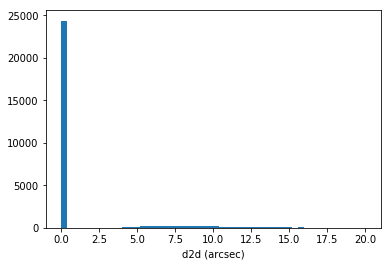

In [5]:
print(len(d2d))  
print(d2d)
print(d2d.arcsecond)
plt.hist(d2d.arcsecond, 50, range=(0, 20)) #, normed=1, alpha=0.75)
plt.xlabel('d2d (arcsec)')

100000
[0d00m00.0526s 12d59m16.8391s 12d59m16.7924s ..., 0d00m00.0396s
 3d19m51.9777s 3d19m51.9843s]
[  5.25972544e-02   4.67568391e+04   4.67567924e+04 ...,   3.95544346e-02
   1.19919777e+04   1.19919843e+04]


Text(0.5,0,'d2d (arcsec)')

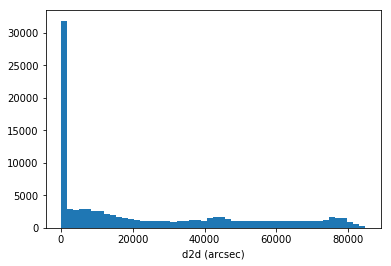

In [6]:
print(len(d2d))  
print(d2d)
print(d2d.arcsecond)
plt.hist(d2d.arcsecond, 50) #, normed=1, alpha=0.75)
plt.xlabel('d2d (arcsec)')

[12d59m16.8391s 12d59m16.7924s 12d59m16.8371s ..., 16d30m55.0068s
 3d19m51.9777s 3d19m51.9843s]
24380


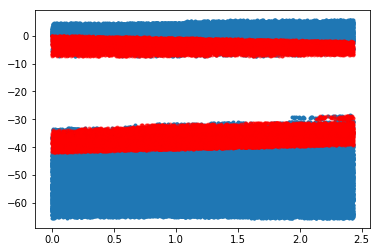

In [7]:
matchlim=2*u.arcsecond
print(d2d[d2d > matchlim])  
print(len(d2d[d2d < matchlim]))  


plt.scatter(rastarcat[np.where(d2d >matchlim)],decstarcat[np.where(d2d > matchlim)], marker='.')
plt.scatter(rastarcat[np.where(d2d < matchlim)],decstarcat[np.where(d2d < matchlim)], marker='.', color="red", alpha=0.5)

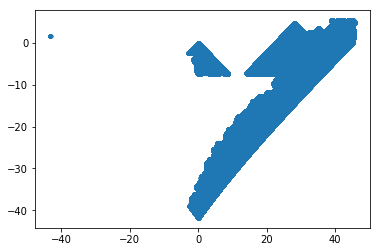

In [8]:
plt.scatter(goldra,golddec, marker='.')

[12d59m16.8391s 12d59m16.7924s 12d59m16.8371s ..., 16d30m55.0068s
 3d19m51.9777s 3d19m51.9843s]
24380
[  2.57869962e-05   7.40334900e-05   4.24243901e-04 ...,   2.43165234e+00
   2.43174433e+00   2.43174572e+00]
[  3.89533041e-05   7.32275673e-05   4.00115745e-04 ...,   2.43163111e+00
   2.43174868e+00   2.43174971e+00]
-0.00303386067799 2.5744255246
3.8953304113e-05 2.43180235697


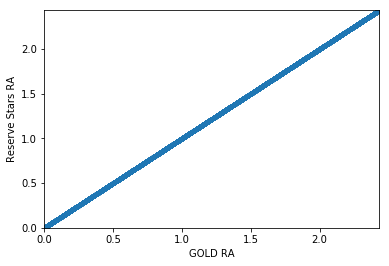

In [9]:
matchlim=2*u.arcsecond
print(d2d[d2d > matchlim])  
print(len(d2d[d2d < matchlim]))  
print(goldra[idx][np.where(d2d < matchlim)])
print(rastarcat[np.where(d2d < matchlim)])
#plt.scatter(goldra[idx], rastarcat, marker='.')
plt.scatter(goldra[idx][np.where(d2d < matchlim)],rastarcat[np.where(d2d < matchlim)], marker='.')
plt.xlabel('GOLD RA')
plt.ylabel('Reserve Stars RA')
plt.ticklabel_format(useOffset=False)
plt.xlim(min(goldra[idx][np.where(d2d < matchlim)]),max(goldra[idx][np.where(d2d < matchlim)]) )
plt.ylim(min(rastarcat[np.where(d2d < matchlim)]),max(rastarcat[np.where(d2d < matchlim)]) )
print(min(goldra[idx]),max(goldra[idx]) )
print(min(rastarcat),max(rastarcat) )

-0.00303386067799 2.5744255246
3.8953304113e-05 2.43180235697


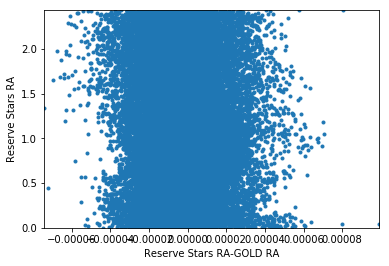

In [10]:
plt.scatter(rastarcat[np.where(d2d < matchlim)]-goldra[idx][np.where(d2d < matchlim)],rastarcat[np.where(d2d < matchlim)], marker='.')
plt.xlabel('Reserve Stars RA-GOLD RA')
plt.ylabel('Reserve Stars RA')
plt.ticklabel_format(useOffset=False)
#plt.xlim(min(goldra[idx][np.where(d2d < matchlim)]),max(goldra[idx][np.where(d2d < matchlim)]) )
plt.ylim(min(rastarcat[np.where(d2d < matchlim)]),max(rastarcat[np.where(d2d < matchlim)]) )
plt.xlim(min(rastarcat[np.where(d2d < matchlim)]-goldra[idx][np.where(d2d < matchlim)]),max(rastarcat[np.where(d2d < matchlim)]-goldra[idx][np.where(d2d < matchlim)]) )
print(min(goldra[idx]),max(goldra[idx]) )
print(min(rastarcat),max(rastarcat) )

'print(idx, d2d, d3d)\nprint("length of star cat: ", len(rastarcat))\nprint("length of gold cat: ", len(ra))\nprint("length of matched indices: ", len(idx))\nprint(rastarcat[idx])\nprint(ra)\nprint(data[\'obs_e1\'])'

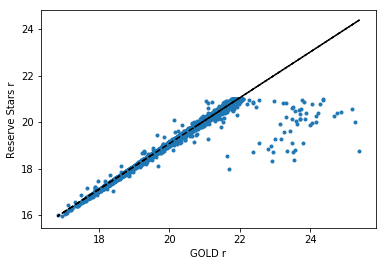

In [12]:
fit = np.polyfit(goldr[idx][np.where(d2d < matchlim)], data['mag'][np.where(d2d < matchlim)], 1)
fit_fn = np.poly1d(fit) 
# fit_fn is now a function which takes in x and returns an estimate for y

plt.plot(goldr[idx][np.where(d2d < matchlim)], fit_fn(goldr[idx][np.where(d2d < matchlim)]), '--k')

plt.scatter(goldr[idx][np.where(d2d < matchlim)], data['mag'][np.where(d2d < matchlim)], marker='.')
plt.xlabel('GOLD r')
plt.ylabel('Reserve Stars r')


"""print(idx, d2d, d3d)
print("length of star cat: ", len(rastarcat))
print("length of gold cat: ", len(ra))
print("length of matched indices: ", len(idx))
print(rastarcat[idx])
print(ra)
print(data['obs_e1'])"""

In [ ]:
tolerance=0.2

if (goldr[idx][np.where(d2d < matchlim)], fit_fn(goldr[idx][np.where(d2d < matchlim)]))

In [ ]:
plt.scatter(goldr[idx][np.where(d2d < matchlim)]-goldi[idx][np.where(d2d < matchlim)], goldi[idx][np.where(d2d < matchlim)]-goldz[idx][np.where(d2d < matchlim)], marker='.')
plt.xlabel('r-i')
plt.ylabel('i-z')

In [ ]:
def compute_res(d):

    de1 =  d['obs_e1']-d[prefix+'_e1']
    de2 =  d['obs_e2']-d[prefix+'_e2']
    dt =  (d['obs_T']-d[prefix+'_T'])
    dtfrac = dt/d['obs_T']
    print('mean de = ',np.mean(de1),np.mean(de2))
    print('mean dt = ',np.mean(dt))

    return dtfrac, dt,  de1, de2

In [ ]:
fracsizeres, sizeres, e1res, e2res=compute_res(data[np.where(d2d < matchlim)])

In [ ]:
print(goldr[idx][np.where(d2d < matchlim)]-goldi[idx][np.where(d2d < matchlim)])
print(goldi[idx][np.where(d2d < matchlim)]-goldz[idx][np.where(d2d < matchlim)])
print(min(goldr[idx][np.where(d2d < matchlim)]-goldi[idx][np.where(d2d < matchlim)]))
print(min(goldi[idx][np.where(d2d < matchlim)]-goldz[idx][np.where(d2d < matchlim)]))

In [ ]:
#want psf vs colour:  #r-i with r or i band psfs and i-z for x-psf
def bin_by_col(m, dT, dTfrac, de1, de2, min_mused):
    min_mag = -0.5 #min(m)
    max_mag = 2 #max(m)
     
    mag_bins = np.linspace(min_mag, max_mag,51)
    print('col_bins = ',mag_bins)

    index = np.digitize(m, mag_bins)
    print('len(index) = ',len(index))
    bin_de1 = [de1[index == i].mean() for i in range(1, len(mag_bins))]
    print('bin_de1 = ',bin_de1)
    bin_de2 = [de2[index == i].mean() for i in range(1, len(mag_bins))]
    print('bin_de2 = ',bin_de2)
    bin_dT = [dT[index == i].mean() for i in range(1, len(mag_bins))]
    print('bin_dT = ',bin_dT)
    bin_dTfrac = [dTfrac[index == i].mean() for i in range(1, len(mag_bins))]
    print('bin_dTfrac = ',bin_dTfrac)
    bin_de1_err = [ np.sqrt(de1[index == i].var() / len(de1[index == i]))
                    for i in range(1, len(mag_bins)) ]
    print('bin_de1_err = ',bin_de1_err)
    bin_de2_err = [ np.sqrt(de2[index == i].var() / len(de2[index == i]))
                    for i in range(1, len(mag_bins)) ]
    print('bin_de2_err = ',bin_de2_err)
    bin_dT_err = [ np.sqrt(dT[index == i].var() / len(dT[index == i]))
                    for i in range(1, len(mag_bins)) ]
    print('bin_dT_err = ',bin_dT_err)
    bin_dTfrac_err = [ np.sqrt(dTfrac[index == i].var() / len(dTfrac[index == i]))
                    for i in range(1, len(mag_bins)) ]
    print('bin_dTfrac_err = ',bin_dTfrac_err)

    # Fix up nans
    for i in range(1,len(mag_bins)):
        if i not in index:
            bin_de1[i-1] = 0.
            bin_de2[i-1] = 0.
            bin_dT[i-1] = 0.
            bin_dTfrac[i-1] = 0.
            bin_de1_err[i-1] = 0.
            bin_de2_err[i-1] = 0.
            bin_dT_err[i-1] = 0.
            bin_dTfrac_err[i-1] = 0.


    fig, axes = plt.subplots(3,1, sharex=True)
    
    ax = axes[0]
    #ax.set_ylim(-0.002,0.002)
    ax.plot([min_mag,max_mag], [0,0], color='black')
    #ax.plot([min_mused,min_mused],[-1,1], color='Grey')
    #ax.fill( [min_mag,min_mag,min_mused,min_mused], [-1,1,1,-1], fill=True, color='Grey',alpha=0.3)
    t_line = ax.errorbar(mag_bins[:-1], bin_dT, yerr=bin_dT_err, color='darkturquoise', fmt='o')
    #ax.axhline(y=0.003, linewidth=4, color='grey')
    #ax.legend([t_line], [r'$\delta T$'])
    ax.set_ylabel(r'$(T_{\rm PSF} - T_{\rm model}) \quad({\rm arcsec}^2)$')

    ax = axes[1]
    #ax.set_ylim(-0.002,0.002)
    ax.plot([min_mag,max_mag], [0,0], color='black')
    #ax.plot([min_mused,min_mused],[-1,1], color='Grey')
    #ax.fill( [min_mag,min_mag,min_mused,min_mused], [-1,1,1,-1], fill=True, color='Grey',alpha=0.3)
    t_line = ax.errorbar(mag_bins[:-1], bin_dTfrac, yerr=bin_dTfrac_err, color='darkturquoise', fmt='o')
    #ax.legend([t_line], [r'$\delta T$'])
    ax.set_ylabel(r'$(T_{\rm PSF} - T_{\rm model})/ T_{\rm PSF}$')

    ax = axes[2]
    #ax.set_ylim(-3.e-4,4.e-4)
    ax.plot([min_mag,max_mag], [0,0], color='black')
    ax.plot([min_mused,min_mused],[-1,1], color='Grey')
    #ax.fill( [min_mag,min_mag,min_mused,min_mused], [-1,1,1,-1], fill=True, color='Grey',alpha=0.3)
    e1_line = ax.errorbar(mag_bins[:-1], bin_de1, yerr=bin_de1_err, color='purple', fmt='o')
    e2_line = ax.errorbar(mag_bins[:-1], bin_de2, yerr=bin_de2_err, color='orange', fmt='o')
    #ax.axhline(y=0.0002, linewidth=4, color='grey')
    #ax.axhline(y=-0.0002, linewidth=4, color='grey')
    ax.legend([e1_line, e2_line], [r'$e_1$', r'$e_2$'])
    ax.set_ylabel(r'$e_{\rm PSF} - e_{\rm model}$')
    ax.set_ylim(-0.015,0.02)
    ax.set_xlim(min_mag,max_mag)
    ax.set_xlabel('r-i')

    fig.set_size_inches(7.0,12.0)
    plt.tight_layout()
    plt.savefig('dpsf_colour.pdf')
    plt.show()

In [ ]:
bin_by_col(goldr[idx][np.where(d2d < matchlim)]-goldi[idx][np.where(d2d < matchlim)], sizeres, fracsizeres, e1res, e2res, 15)